<a href="https://colab.research.google.com/github/imsumit8/python_beginner/blob/main/Viz_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv -O vgsales.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv
To: /content/vgsales.csv
100% 2.04M/2.04M [00:00<00:00, 23.4MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [5]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_gen = data['Genre'].value_counts().index[:3]
top3_plat = data['Platform'].value_counts().index[:3]

top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257


In [6]:
top3_data.shape

(617, 11)

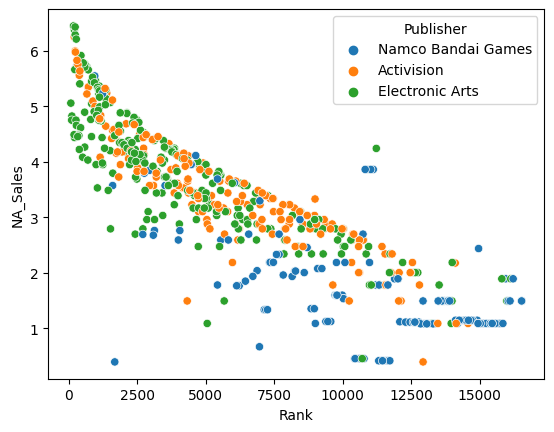

In [8]:
sns.scatterplot(data = top3_data, x='Rank', y ='NA_Sales',hue='Publisher')
plt.show()

#Conclusion
Namco publishes low rank games compared to other two.

EA publishes a lot of high rank games

<function matplotlib.pyplot.show(close=None, block=None)>

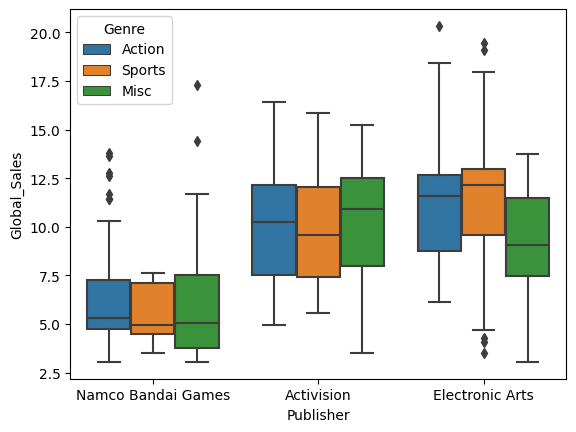

In [11]:
sns.boxplot(data=top3_data,x='Publisher',y='Global_Sales',hue='Genre')
plt.show

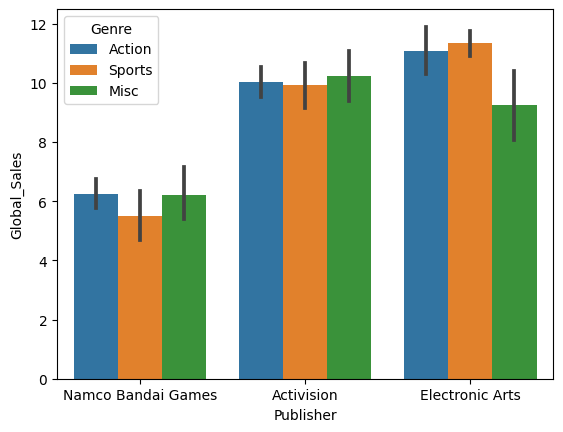

In [25]:
sns.barplot(data=top3_data,x='Publisher',y='Global_Sales',hue='Genre')
plt.show()

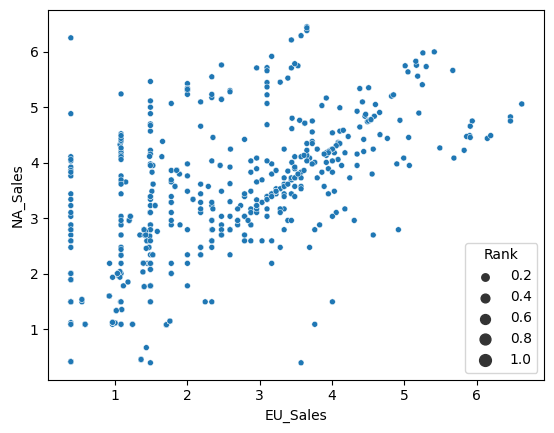

In [19]:
sns.scatterplot(data = top3_data, x='EU_Sales', y ='NA_Sales',size=1/data['Rank'])
plt.show()

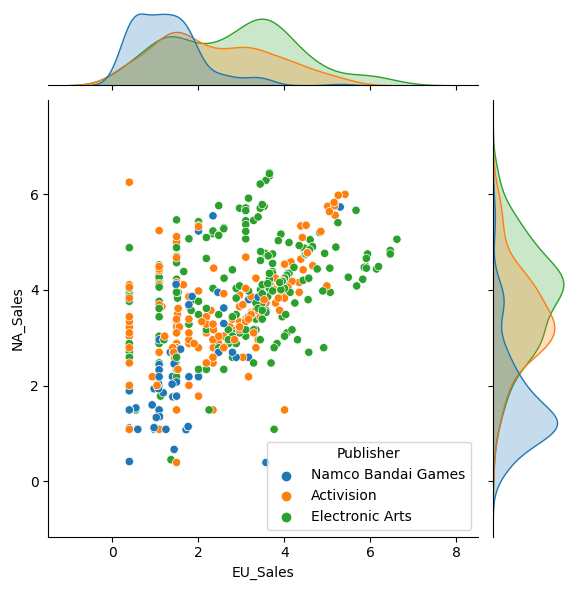

In [21]:
sns.jointplot(data = top3_data, x='EU_Sales', y ='NA_Sales',hue='Publisher',kind='scatter')
plt.show()

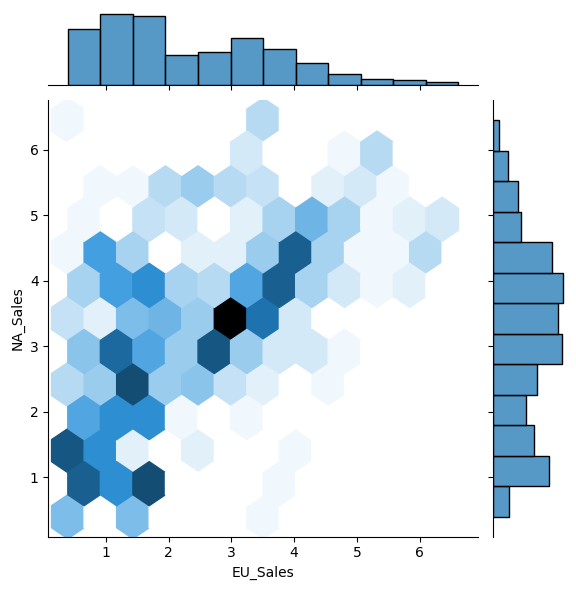

In [23]:
sns.jointplot(data = top3_data, x='EU_Sales', y ='NA_Sales',kind='hex')
plt.show()

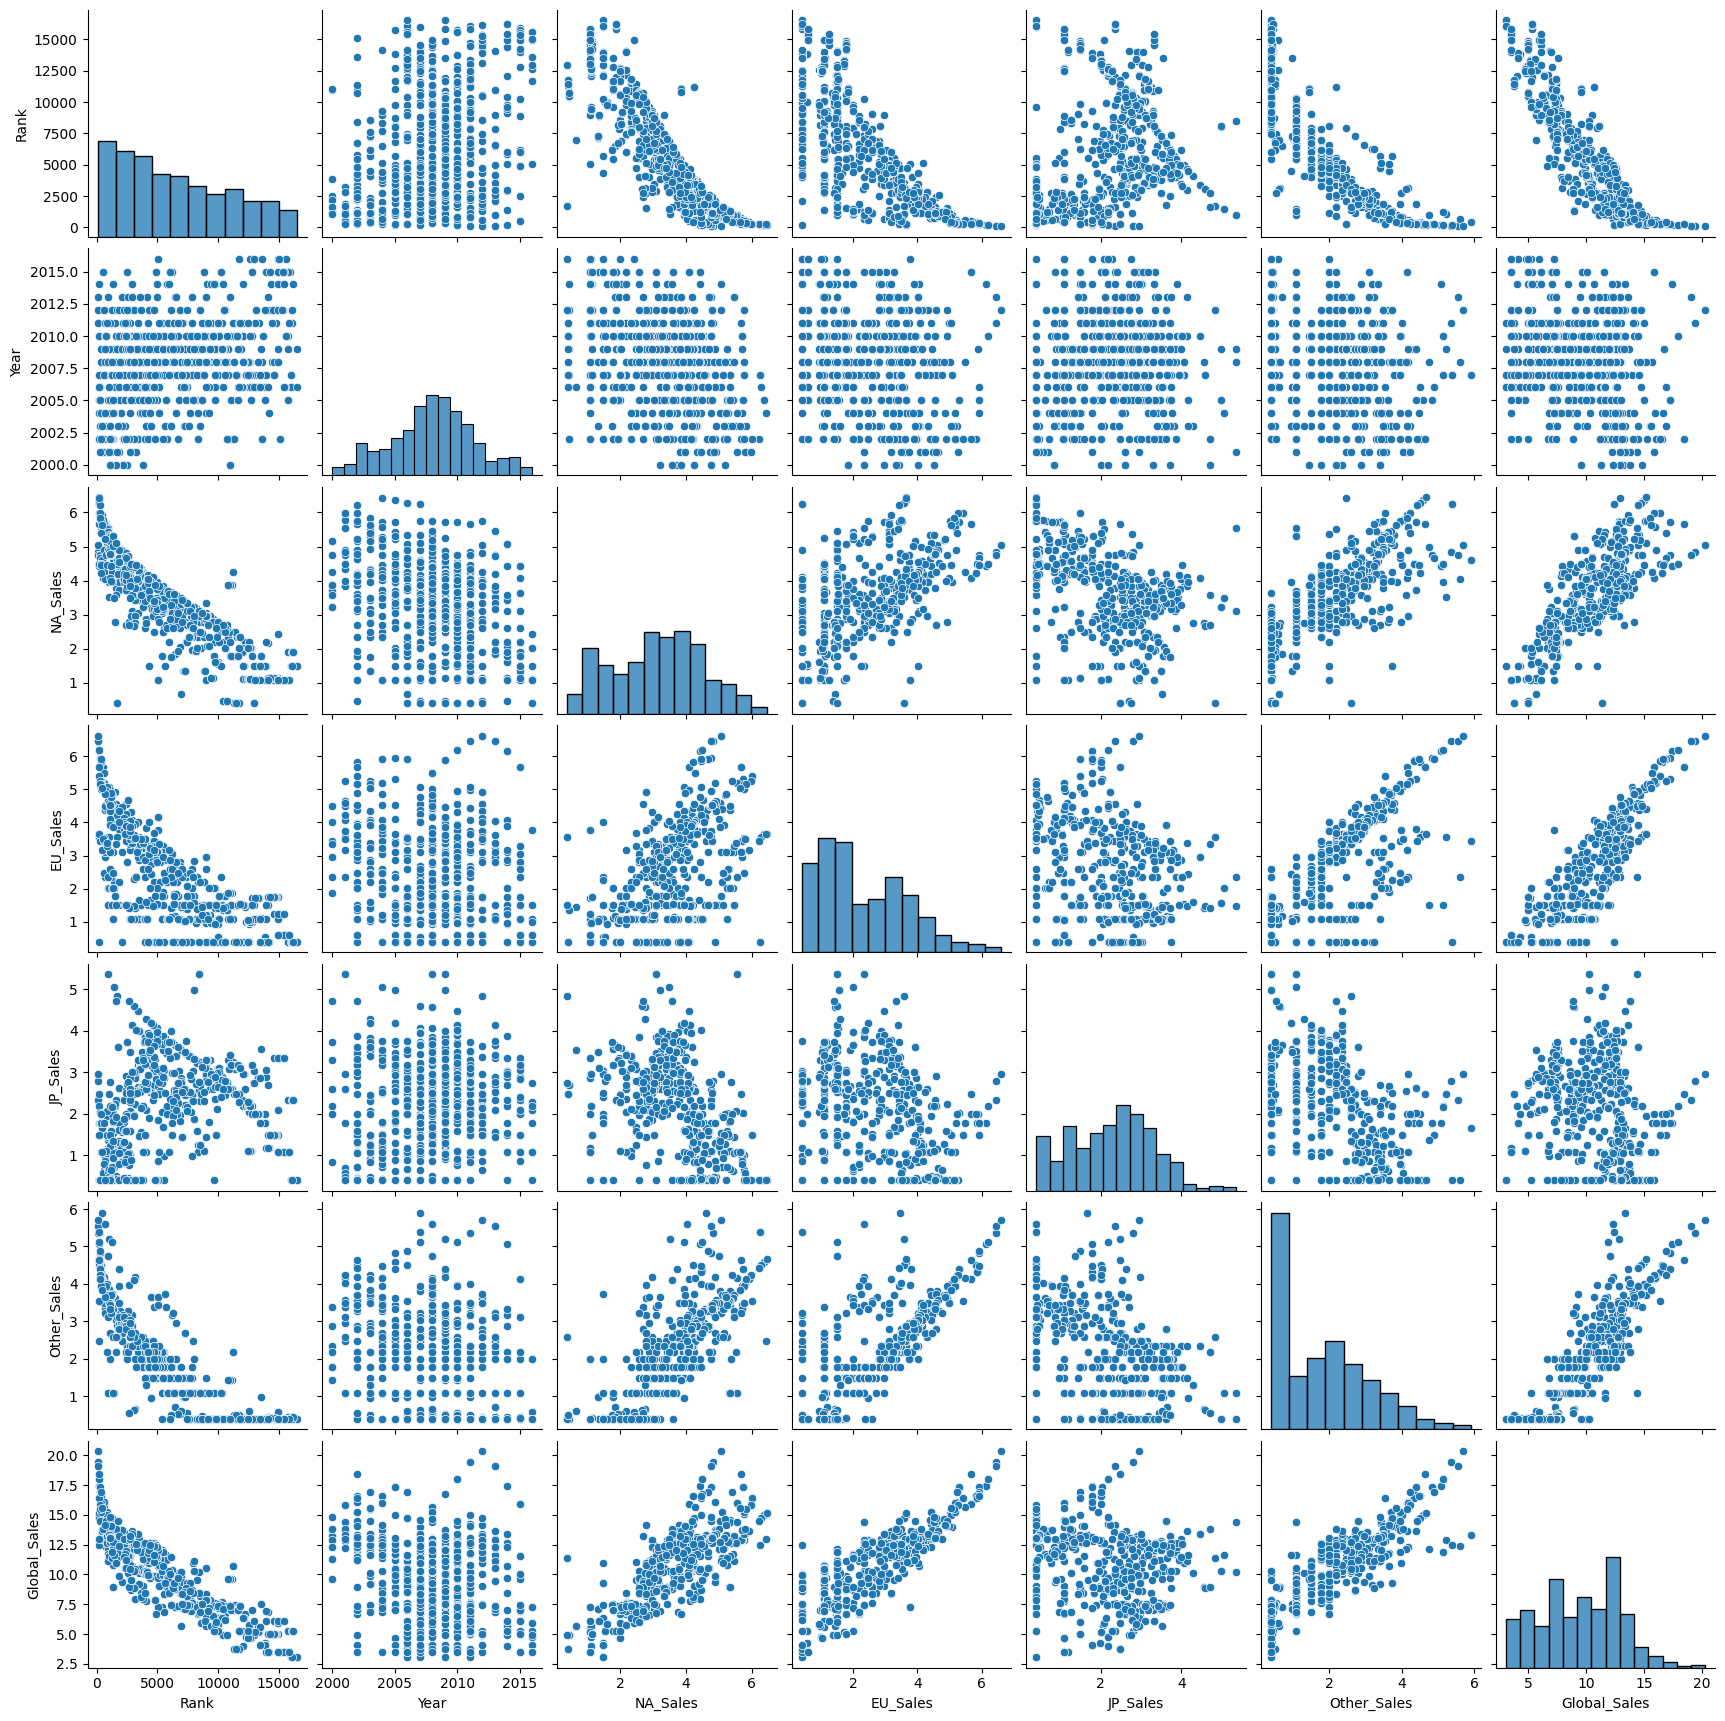

In [26]:
sns.pairplot(data=top3_data)
plt.show()

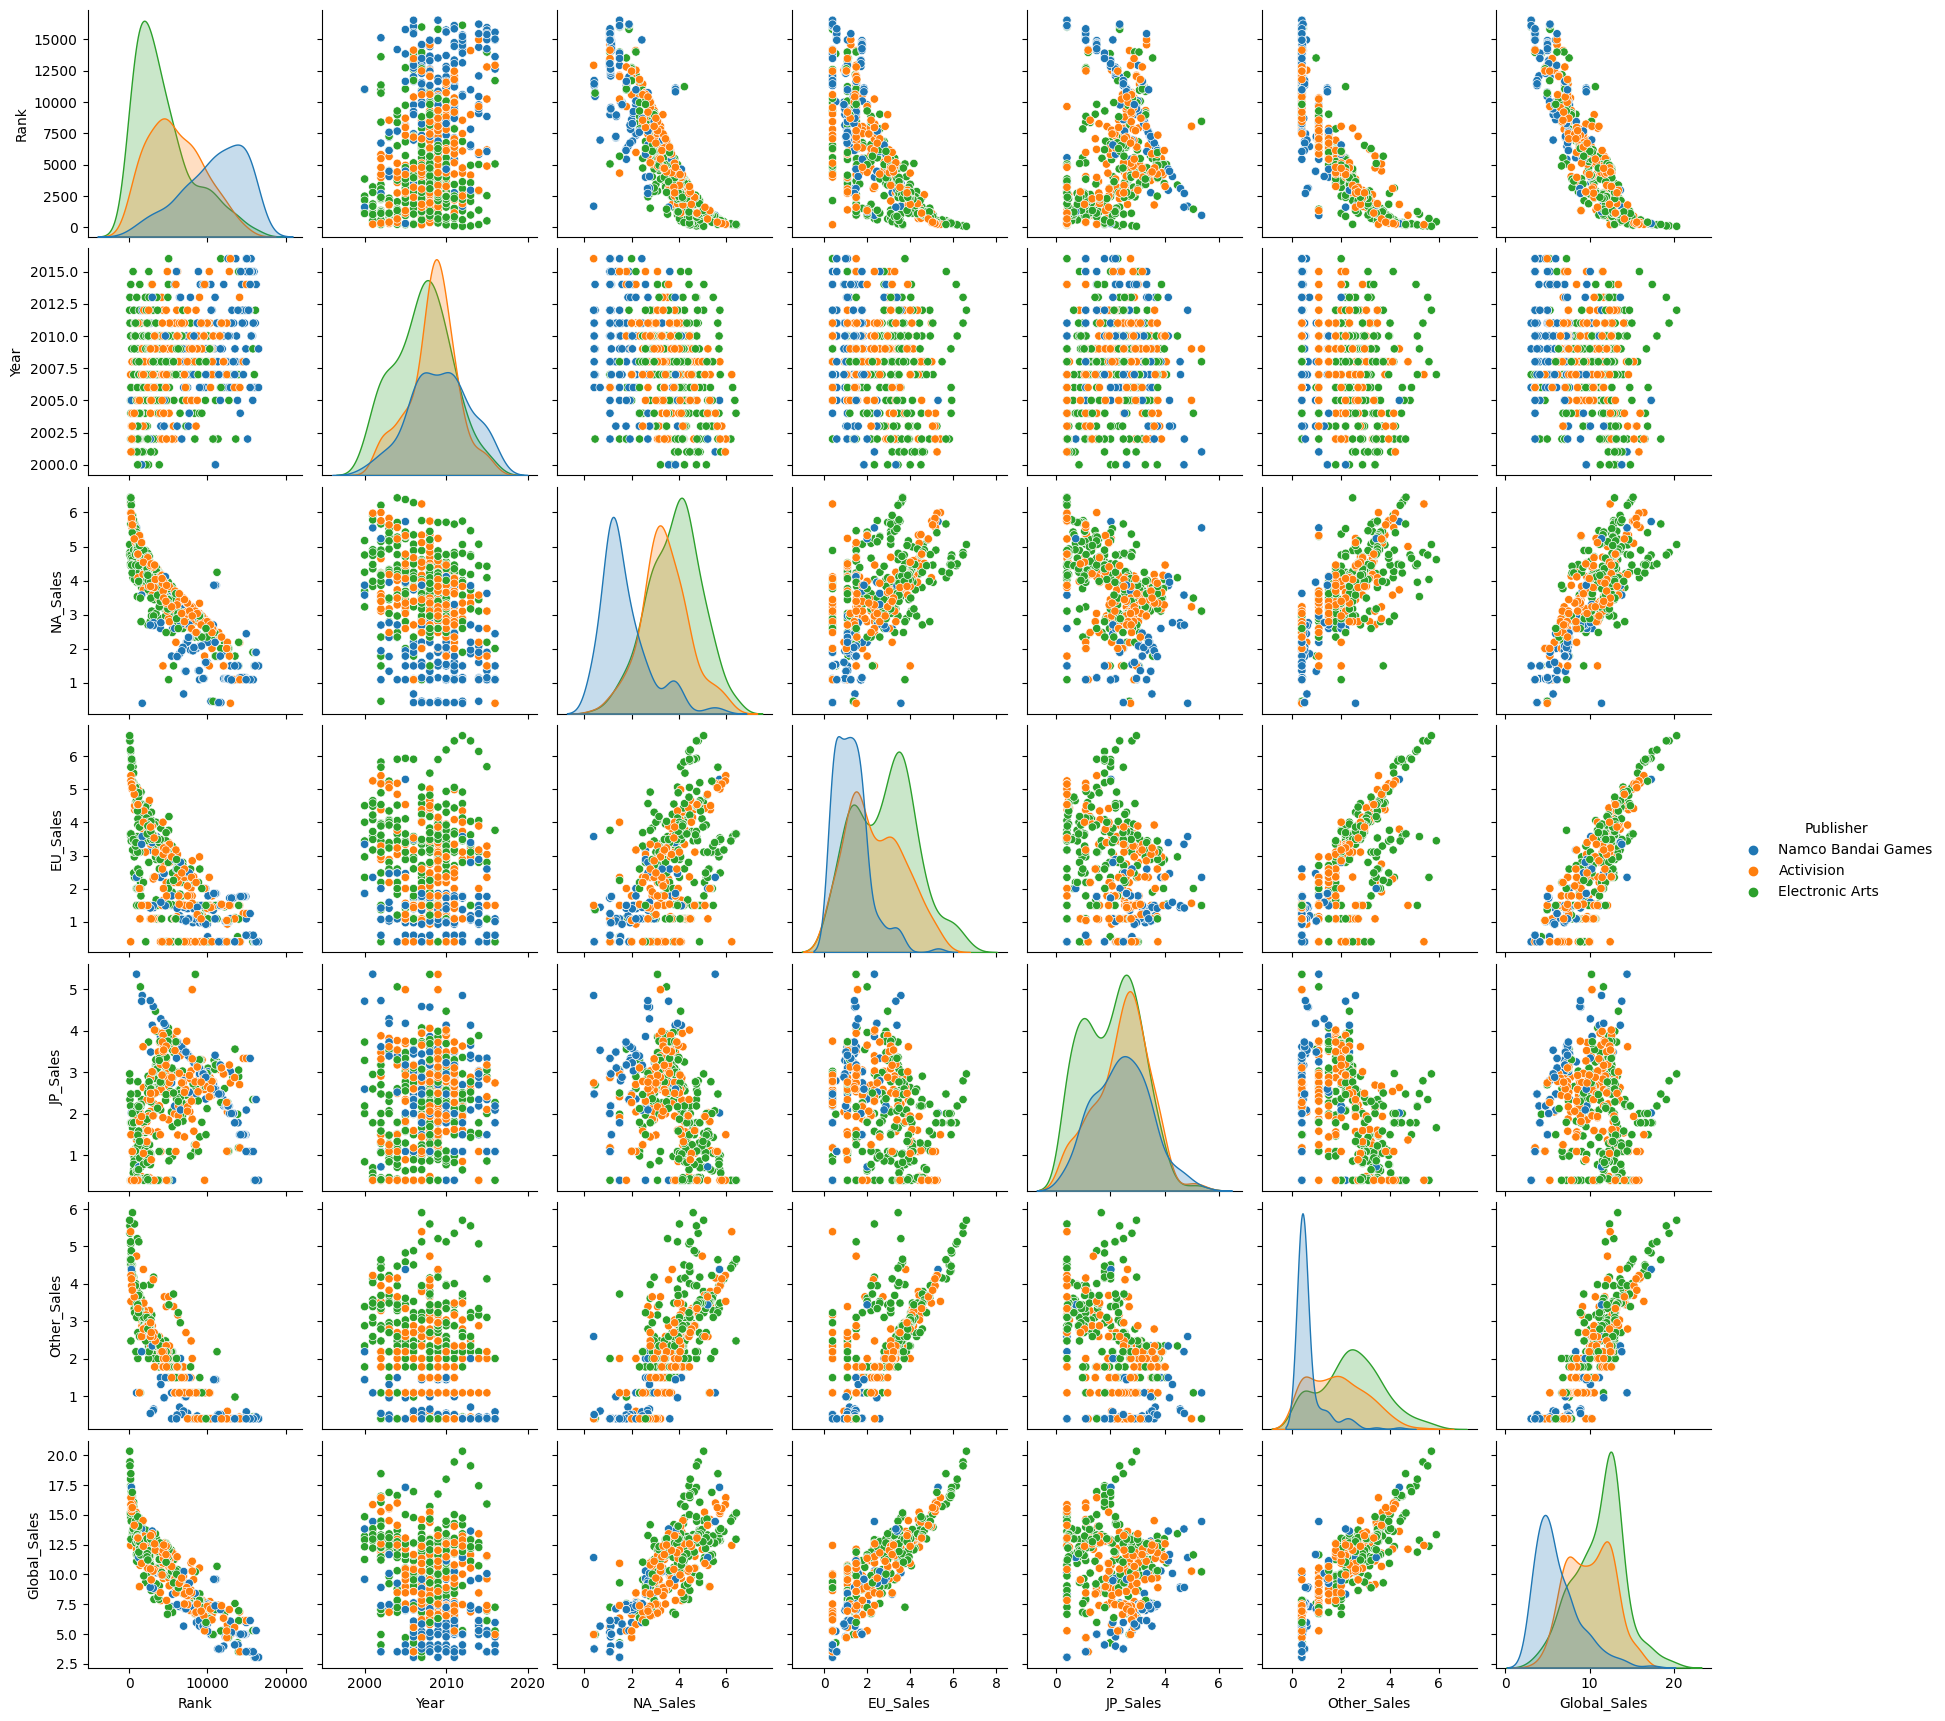

In [27]:
sns.pairplot(data=top3_data,hue='Publisher')
plt.show()

In [29]:
corr=top3_data.corr()
corr

<ipython-input-29-595e7796d1b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=top3_data.corr()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


<Axes: >

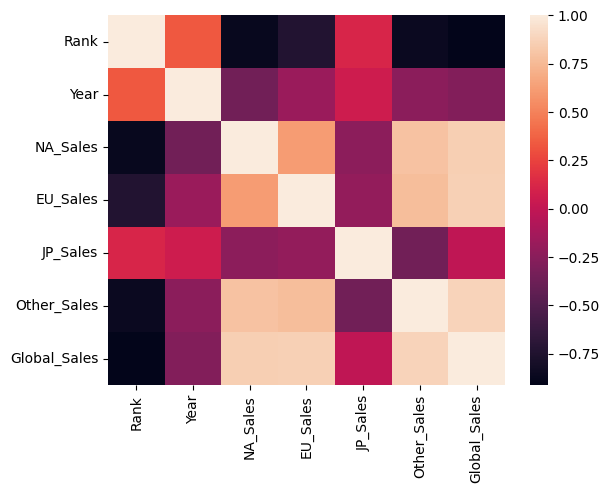

In [30]:
sns.heatmap(corr)

<Axes: >

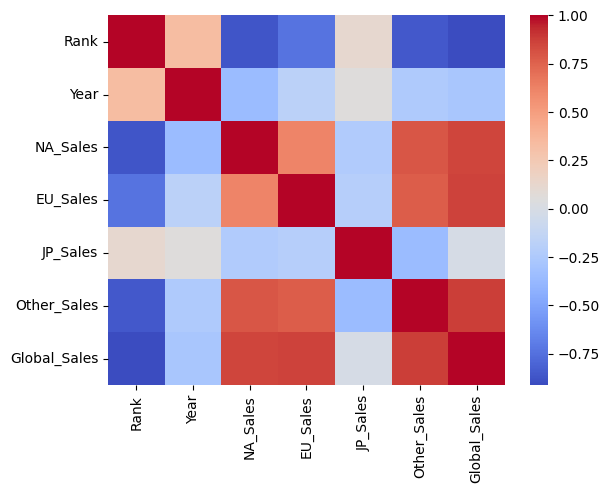

In [31]:
sns.heatmap(corr,cmap='coolwarm')

<Axes: >

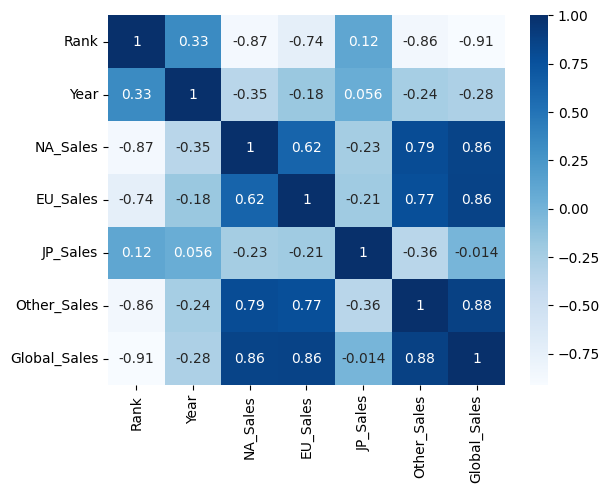

In [35]:
sns.heatmap(corr,cmap='Blues',annot=True)

<Axes: >

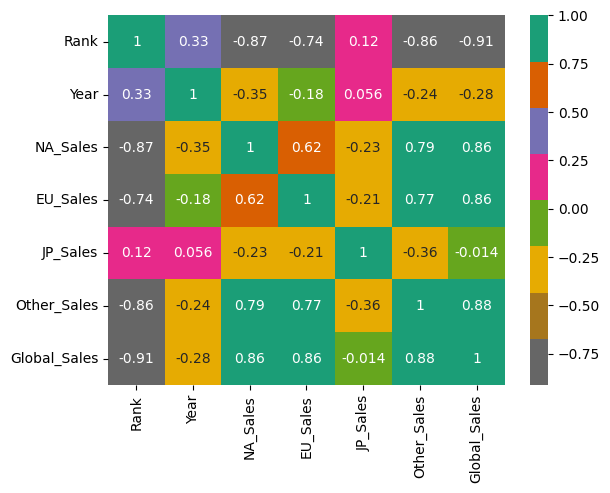

In [37]:
sns.heatmap(corr,cmap='Dark2_r',annot=True)

In [33]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [38]:
titanic=sns.load_dataset('titanic')

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
